# Linear Regression Assignment 

## Bike Sharing System

### Multiple Linear Regression


In [107]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#### Reading the input data for analysis

In [7]:
bikesharing_data = pd.read_csv('day.csv',encoding = "ISO-8859-1", low_memory=False)
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Read the information about the columns, column labels, column data types e.t.c.,

In [9]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


There are total 730 rows and 16 columns and all are of non-null values which is good to go for further analysis...
Only "dteday" column is of type "object" and all the other columns are either integer or float types.

Next we can look for the duplicates (if any available in the given dataset).

In [10]:
bikesharing_data.drop_duplicates(subset=None, inplace = True)
bikesharing_data.shape

(730, 16)

The no.of rows and columns are still the same (730,16). So there are no duplicates in the given dataset.

### Dropping unwanted columns

In [13]:
bikesharing_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

As given in the assignment the columns 'instant', 'dteday', 'casual', 'registered' needs to be removed as it is not having much impact for the analysis.

In [18]:
col_to_remove = ['instant', 'dteday', 'casual', 'registered']
bikesharing_data = bikesharing_data.drop(col_to_remove, axis = 1)


KeyError: "['instant' 'dteday' 'casual' 'registered'] not found in axis"

In [19]:
bikesharing_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 94.1 KB


The no.of columns are reduced from 16 to 12 for analysis.

## Now we need to create dummy variables for 4 columns

season, weekday, month, weathersit

In [21]:
bikesharing_data['season'] = bikesharing_data['season'].astype('category')
bikesharing_data['mnth'] = bikesharing_data['mnth'].astype('category')
bikesharing_data['weekday'] = bikesharing_data['weekday'].astype('category')
bikesharing_data['weathersit'] = bikesharing_data['weathersit'].astype('category')

In [22]:
bikesharing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(4)
memory usage: 75.2 KB


In [23]:
bikesharing_data_new = pd.get_dummies(bikesharing_data, drop_first=True)
bikesharing_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

## Now the data needs to be split to 70 : 30 ratio for test and train data set.

In [25]:
np.random.seed(0)
df_train, df_test = train_test_split(bikesharing_data_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [27]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null int64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4 

(510, 30)

In [28]:
df_test.info()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
yr              219 non-null int64
holiday         219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
atemp           219 non-null float64
hum             219 non-null float64
windspeed       219 non-null float64
cnt             219 non-null int64
season_2        219 non-null uint8
season_3        219 non-null uint8
season_4        219 non-null uint8
mnth_2          219 non-null uint8
mnth_3          219 non-null uint8
mnth_4          219 non-null uint8
mnth_5          219 non-null uint8
mnth_6          219 non-null uint8
mnth_7          219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
mnth_10         219 non-null uint8
mnth_11         219 non-null uint8
mnth_12         219 non-null uint8
weekday_1       219 non-null uint8
weekday_2       219 non-null uint8
weekday_3       219 non-null uint8
weekday_4  

(219, 30)

### The Numerical variables needs to be visualized for further analysis

In [30]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

The numeric values are available only in the columns temp', 'atemp', 'hum', 'windspeed','cnt'.

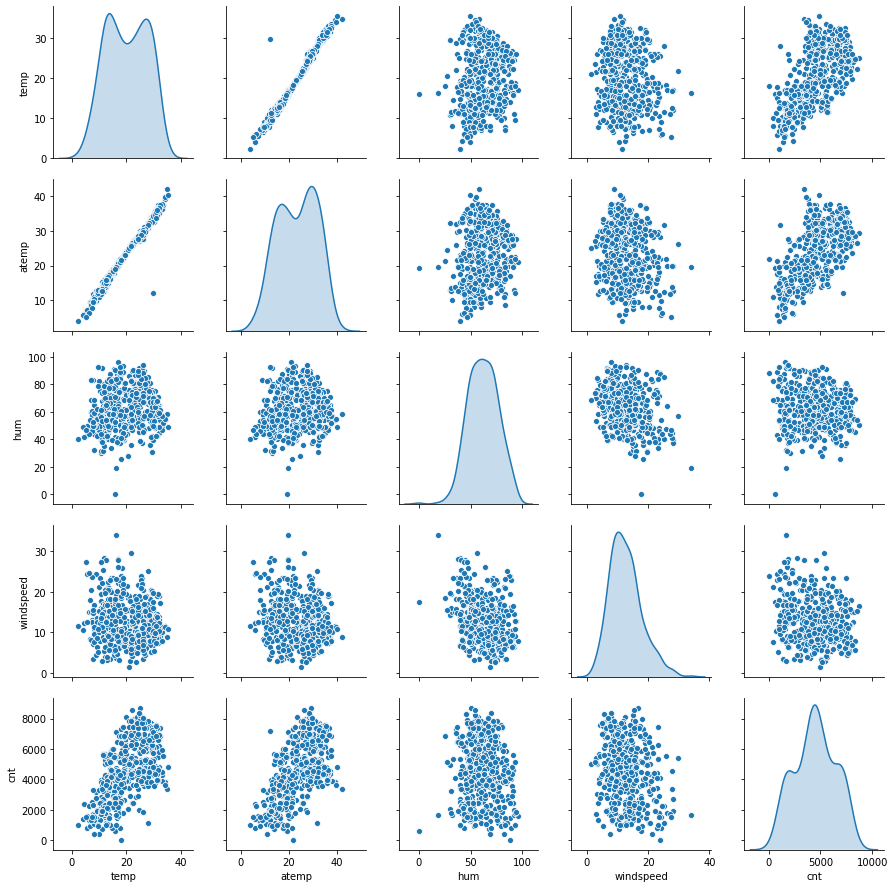

In [32]:
df_numeric = df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

From the above plot we can derive that there is a linear relation exist between 'temp','atemp' and 'cnt'.

### The Categorical variables needs to be visualized for further analysis

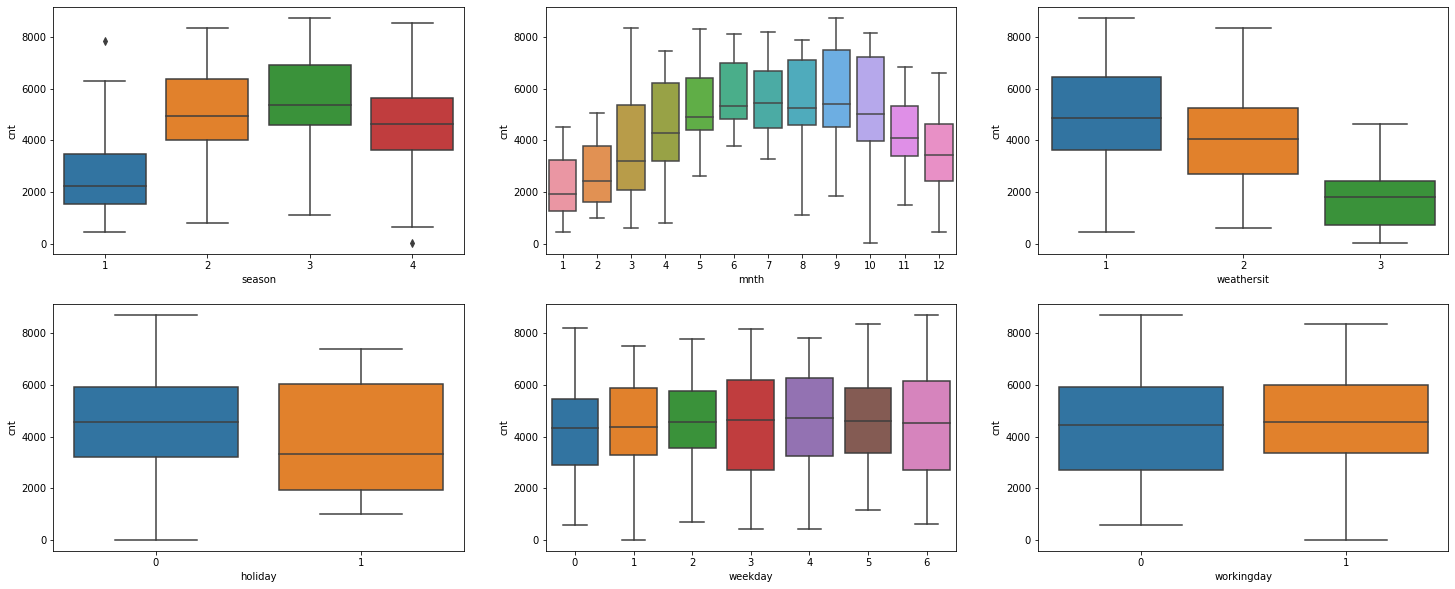

In [34]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing_data)
plt.show()

As per this analysis the following are the outcomes,

     More than 5000 bookings are there in season 3 and is followed by season 2 and 4. This means that season can be one of the predictors.
     The bookings are over 4000 in the months of 6,7,8,9,10. So it has some control over the analysis.
     The weathersit has almost 5000 bookings in weather1 and followed by weather2. So weather has some trends for consideration.
     The variable 'holiday' has nothing much impact on the prediction.
     It is either weekday or weekend there is no significant change in the trend and is not having much impact.
     It is close to 5000 booking on working day and is having some impact on the prediction.

### Lets figure out the co-relation matrix for further analysis

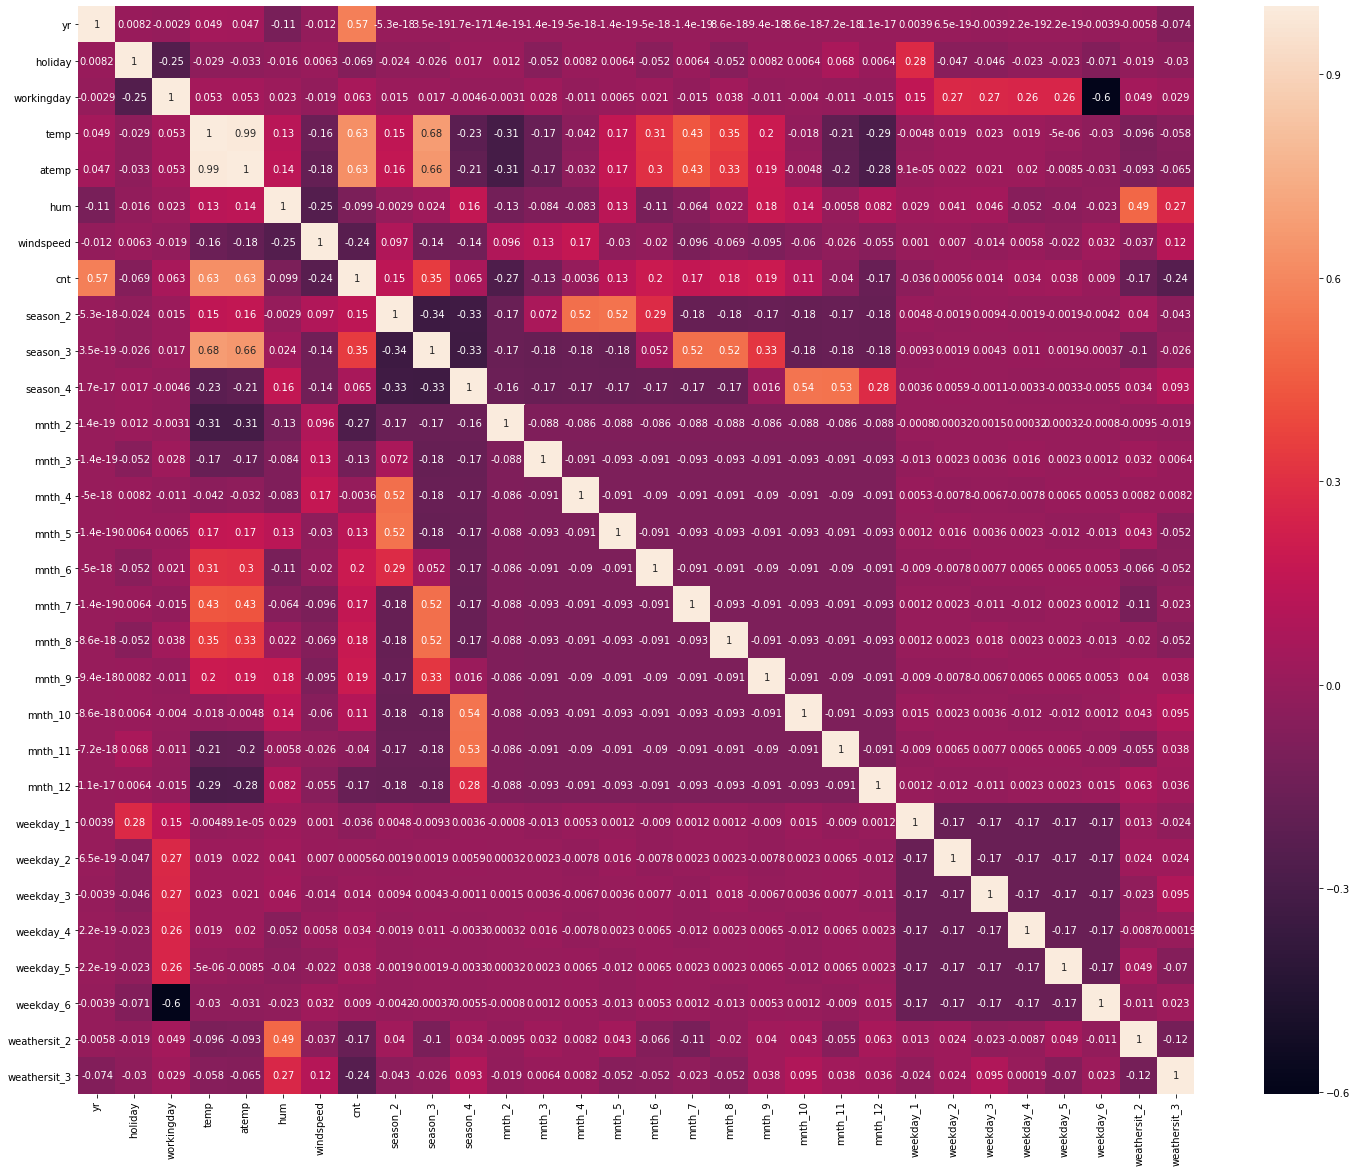

In [37]:
plt.figure(figsize = (25,20))
sns.heatmap(bikesharing_data_new.corr(), annot = True)
plt.show()

The are many variables which are highly corelated.

In [39]:
scaler = MinMaxScaler()
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [48]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For the model building we need X and Y sets

In [50]:
y_train = df_train.pop('cnt')
X_train = df_train

Starting with RFE

In [53]:
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

rfe = RFE(linearReg, 15)             
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [55]:
validCol = X_train.columns[rfe.support_]
print(validCol)

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')


In [56]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [57]:
X_train_rfe = X_train[validCol]

## Building Linear Model

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features     VIF
2           temp  384.22
3          atemp  363.12
4            hum   17.52
7       season_3    7.09
5      windspeed    4.71
1     workingday    4.61
6       season_2    3.54
8       season_4    3.01
13  weathersit_2    2.14
0             yr    2.02
12     weekday_6    1.80
11       mnth_10    1.66
10        mnth_9    1.28
9         mnth_3    1.20
14  weathersit_3    1.17


In [63]:
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()


In [66]:
lr1.params

const           0.195340
yr              0.228741
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
season_2        0.130228
season_3        0.079599
season_4        0.153475
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
weekday_6       0.054618
weathersit_2   -0.047472
weathersit_3   -0.271174
dtype: float64

In [67]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.28e-186
Time:                        22:25:44   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

As per the rule first removing the high VIF and high p-value. i.e., atemp

In [69]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 14 columns):
yr              510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_3          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
weekday_6       510 non-null uint8
weathersit_2    510 non-null uint8
weathersit_3    510 non-null uint8
dtypes: float64(3), int64(2), uint8(9)
memory usage: 48.4 KB


In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features    VIF
2           temp  23.21
3            hum  17.23
6       season_3   7.01
1     workingday   4.60
4      windspeed   4.55
5       season_2   3.54
7       season_4   3.01
12  weathersit_2   2.14
0             yr   2.02
11     weekday_6   1.79
10       mnth_10   1.66
9         mnth_9   1.28
8         mnth_3   1.20
13  weathersit_3   1.17


In [72]:
X_train_lm2 = sm.add_constant(X_train_new)
lr2 = sm.OLS(y_train, X_train_lm2).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
lr2.params

const           0.196221
yr              0.228723
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [74]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.00e-187
Time:                        22:32:41   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

Now removing variables with high VIF values. As discussed on the Linear Regression session 'temp' might be required for the model so removing 'hum' column.

In [75]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

,Features,VIF
2,temp,16.81
5,season_3,6.75
3,windspeed,4.27
1,workingday,4.11
4,season_2,3.51
6,season_4,2.89
0,yr,2.02
9,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [77]:
X_train_lm3 = sm.add_constant(X_train_new)
lr3 = sm.OLS(y_train, X_train_lm3).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [78]:
lr3.params

const           0.091594
yr              0.233129
workingday      0.042443
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [79]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.52e-184
Time:                        22:36:25   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

Season 3 has high VIF value and need to be removed.

In [80]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.92
3,windspeed,4.15
1,workingday,4.07
0,yr,2.01
5,season_4,1.98
9,weekday_6,1.66
8,mnth_10,1.63
4,season_2,1.56
10,weathersit_2,1.54
7,mnth_9,1.23


In [83]:
X_train_lm4 = sm.add_constant(X_train_new)
lr4 = sm.OLS(y_train, X_train_lm4).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
lr4.params

const           0.076726
yr              0.231340
workingday      0.042231
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [85]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.56e-181
Time:                        22:39:20   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

Now high p-values needs to be removed. it is mnth_10.

In [86]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.80
3,windspeed,4.11
1,workingday,4.07
0,yr,2.00
8,weekday_6,1.66
4,season_2,1.56
9,weathersit_2,1.53
5,season_4,1.41
7,mnth_9,1.20
6,mnth_3,1.15


In [88]:
X_train_lm5 = sm.add_constant(X_train_new)
lr5 = sm.OLS(y_train, X_train_lm5).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [89]:
lr5.params

const           0.074194
yr              0.230191
workingday      0.042294
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [90]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.39e-181
Time:                        22:41:07   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

Removing mnth_3 as it is having high p-value.

In [91]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


In [93]:
X_train_lm6 = sm.add_constant(X_train_new)
lr6 = sm.OLS(y_train, X_train_lm6).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
lr6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [95]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.77e-181
Time:                        22:45:12   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

Now the VIF values are < 5 and the p-values are 0. This model looks good for testing with the test model.

As per this lr6 not all the co-eff are equal to 0. So the NULL Hypotheses is rejected.

F-Statistic = 233.8 which is >1 and the p-value is 0 which is the model is significant.

### Residual analysis of the training data

In [96]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

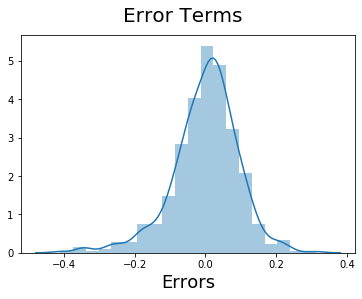

In [97]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)     

This histogram is normally distributed. So it is compatible with Linear Regression.

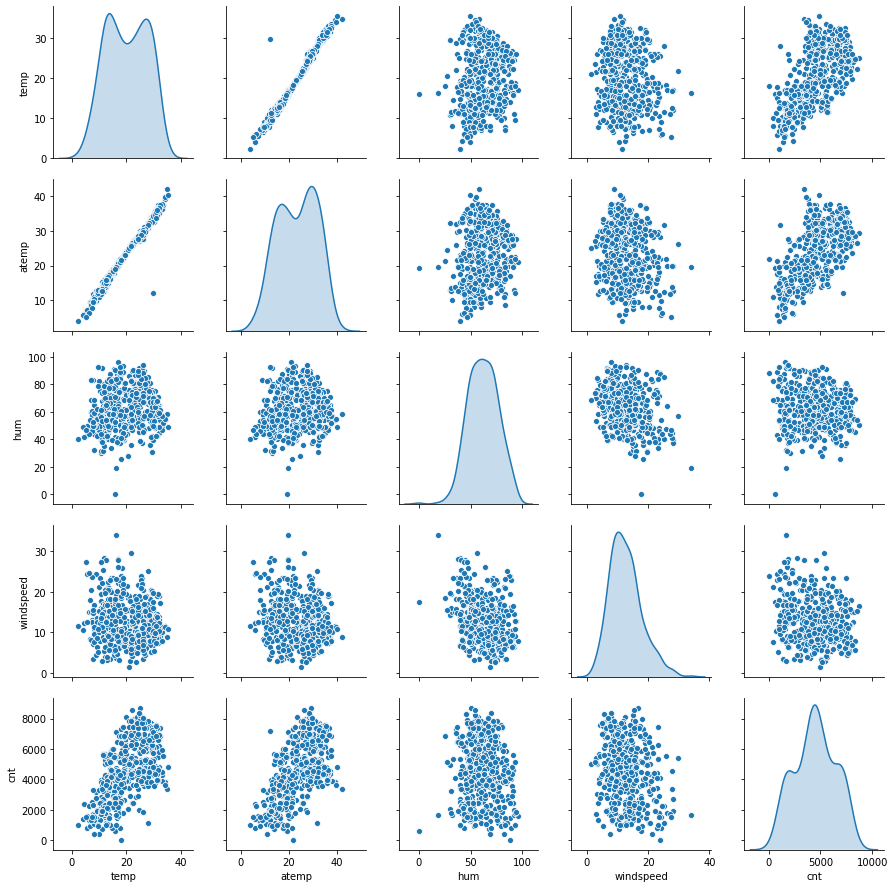

In [99]:
bikesharing_data_new=bikesharing_data_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_numeric, diag_kind='kde')
plt.show()

As explained in the intial steps there is a linear relation exists among 'temp','atemp' and 'cnt'

In [100]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.02
1,workingday,4.01
0,yr,2.00
7,weekday_6,1.65
4,season_2,1.56
8,weathersit_2,1.52
5,season_4,1.38
6,mnth_9,1.20
9,weathersit_3,1.07


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# Let us test the model with the test set

In [101]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,3.957390,4.941955,43.6522,16.522200,986.0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,20.295000,24.399800,50.2917,12.791439,7460.0,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,33.722500,39.519800,57.3750,8.417143,4672.0,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,25.454153,29.198350,53.0417,17.042589,7129.0,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,15.819153,19.822700,59.5417,4.125244,3750.0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [102]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,20.561863,24.047735,63.772104,12.768098,4532.182648,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,7.550239,8.206161,13.817867,5.185435,1911.832231,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,3.957390,4.941955,29.000000,3.875669,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.153918,17.210000,53.229200,9.062587,3192.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.773347,24.873150,63.750000,12.166932,4592.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.145403,30.966450,73.375000,15.660647,5905.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,41.318550,97.250000,28.292425,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
yr              219 non-null int64
holiday         219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
atemp           219 non-null float64
hum             219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_3        219 non-null uint8
season_4        219 non-null uint8
mnth_2          219 non-null uint8
mnth_3          219 non-null uint8
mnth_4          219 non-null uint8
mnth_5          219 non-null uint8
mnth_6          219 non-null uint8
mnth_7          219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
mnth_10         219 non-null uint8
mnth_11         219 non-null uint8
mnth_12         219 non-null uint8
weekday_1       219 non-null uint8
weekday_2       219 non-null uint8
weekday_3       219 non-null uint8
weekday_4       219 non-null uint8
weekday_5  

In [104]:
col1=X_train_new.columns
X_test=X_test[col1]

X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
const           219 non-null float64
yr              219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_4        219 non-null uint8
mnth_9          219 non-null uint8
weekday_6       219 non-null uint8
weathersit_2    219 non-null uint8
weathersit_3    219 non-null uint8
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
y_pred = lr6.predict(X_test_lm6)
y_pred

22     -0.249504
468     9.908066
553    18.015247
504    12.099196
353     8.457002
386     1.919477
415     4.403339
599    15.558054
301     2.182675
352     4.851641
292     6.861027
295     8.922157
195    13.554742
726     4.520909
612    15.523220
455     8.371941
718     6.660525
64      5.140670
149    15.748430
136    10.230511
5       3.918188
276     9.303909
261    11.259781
465     5.428452
350     3.636211
343     4.199579
332     8.088965
448     8.137169
60      4.667823
377     2.762222
         ...    
436    10.950589
633    12.714189
317     9.315535
524    15.380433
559    15.055930
454     7.575686
144    13.877054
205    16.360253
562    18.078613
425     6.941606
262    11.723191
373     4.435147
587    14.152618
79      7.079135
304     8.108995
442    11.264442
653     9.414590
648     8.650822
408     3.760401
493    11.403120
161    15.367130
463     8.020239
153    11.905259
646     8.755116
478     7.399263
237    15.430085
611    14.768438
258     9.2817

# Final Evaluation

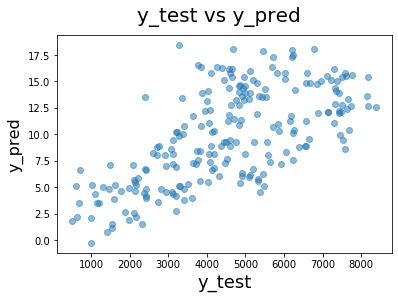

In [120]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [118]:
r2_score(y_test, y_pred)

-5.617868146153038